# Avaliação Prática – Análise Econômica e Criptofinanceira com Alpha Vantage (Câmbio e Bitcoin)

## Pré-Processamento de Dados

### Importação de Bibliotecas

In [88]:
!pip install plotly --upgrade

In [89]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Consumo da API Alpha Vantage para Carregamento das Fontes de Dados e Conversão para Pandas Dataframe

#### Função "FX_DAILY" da API para Consumo de Dados sobre Câmbio USD/BRL

In [91]:
url_fx_currency = 'https://www.alphavantage.co/query?function=FX_DAILY&outputsize=full&from_symbol=USD&to_symbol=BRL&apikey=NES1FN2QJITLR295'

In [92]:
r = requests.get(url_fx_currency)

In [93]:
data = r.json()

In [94]:
fx_time_series = data['Time Series FX (Daily)']
fx_df = pd.DataFrame.from_dict(fx_time_series, orient='index')
fx_df.index = pd.to_datetime(fx_df.index)
fx_df = fx_df.sort_index()
fx_df

,1. open,2. high,3. low,4. close
2014-11-07,2.55730,2.58100,2.55630,2.55900
2014-11-10,2.56400,2.57150,2.53250,2.55250
2014-11-11,2.56450,2.56600,2.55690,2.56450
2014-11-12,2.56450,2.56670,2.53510,2.56670
2014-11-13,2.56550,2.60420,2.56000,2.59430
...,...,...,...,...
2025-04-28,5.68650,5.69940,5.64550,5.65370
2025-04-29,5.65170,5.66230,5.61810,5.63260
2025-04-30,5.63260,5.68640,5.60310,5.66320
2025-05-01,5.66320,5.67930,5.66320,5.66320


#### Função "DIGITAL_CURRENCY_DAILY" da API para Consumo de Dados de Bitcoin em EUR

In [95]:
url_btc = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=EUR&apikey=NES1FN2QJITLR295'

In [96]:
r = requests.get(url_btc)

In [97]:
data = r.json()

In [98]:
btc_time_series = data['Time Series (Digital Currency Daily)']
btc_df = pd.DataFrame.from_dict(btc_time_series, orient='index')
btc_df.index = pd.to_datetime(btc_df.index)
btc_df = btc_df.sort_index()
btc_df

,1. open,2. high,3. low,4. close,5. volume
2024-05-19,61588.52000000,62261.43000000,60587.46000000,60927.75000000,202.69537382
2024-05-20,60930.51000000,65700.00000000,60750.00000000,65521.16000000,542.13763679
2024-05-21,65521.16000000,65933.02000000,63494.57000000,64375.99000000,628.58154046
2024-05-22,64375.99000000,65138.74000000,63653.03000000,63816.00000000,376.19678098
2024-05-23,63816.00000000,64541.13000000,61333.00000000,62836.76000000,470.83392201
...,...,...,...,...,...
2025-04-29,83334.29000000,83941.73000000,82354.90000000,82783.16000000,190.01361889
2025-04-30,82783.16000000,83777.88000000,81751.27000000,83185.77000000,186.95131923
2025-05-01,83177.69000000,86376.89000000,83134.33000000,85446.97000000,309.62393948
2025-05-02,85459.81000000,86399.00000000,85043.40000000,85760.36000000,205.06513120


#### Unificação das Fontes de Dados por Alinhamento Temporal por Data

In [99]:
fx_btc_df = pd.merge(fx_df, btc_df, left_index=True, right_index=True, how='inner')
fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume
2024-05-20,5.10290,5.12860,5.09000,5.10830,60930.51000000,65700.00000000,60750.00000000,65521.16000000,542.13763679
2024-05-21,5.10830,5.12480,5.08340,5.11450,65521.16000000,65933.02000000,63494.57000000,64375.99000000,628.58154046
2024-05-22,5.11450,5.16350,5.11450,5.15310,64375.99000000,65138.74000000,63653.03000000,63816.00000000,376.19678098
2024-05-23,5.15500,5.16000,5.12500,5.15850,63816.00000000,64541.13000000,61333.00000000,62836.76000000,470.83392201
2024-05-24,5.15850,5.17610,5.13010,5.17070,62839.02000000,63878.65000000,61540.66000000,63232.74000000,245.38978772
...,...,...,...,...,...,...,...,...,...
2025-04-28,5.68650,5.69940,5.64550,5.65370,82686.69000000,84249.00000000,81776.11000000,83320.25000000,232.89022484
2025-04-29,5.65170,5.66230,5.61810,5.63260,83334.29000000,83941.73000000,82354.90000000,82783.16000000,190.01361889
2025-04-30,5.63260,5.68640,5.60310,5.66320,82783.16000000,83777.88000000,81751.27000000,83185.77000000,186.95131923
2025-05-01,5.66320,5.67930,5.66320,5.66320,83177.69000000,86376.89000000,83134.33000000,85446.97000000,309.62393948


### Aplicação de Requisitos da Prova

#### Filtro do Dataframe para Últimos 90 Dias

In [100]:
fx_btc_df = fx_btc_df.tail(90)
fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032
2024-12-31,6.18400,6.19500,6.17780,6.18400,89007.78000000,92638.09000000,88252.45000000,90119.83000000,397.73855381
2025-01-01,6.18400,6.18400,6.18400,6.18400,90116.04000000,91749.00000000,89665.00000000,91175.14000000,233.82039366
2025-01-02,6.18400,6.22710,6.14400,6.15190,91173.50000000,95306.46000000,91000.00000000,94383.32000000,398.80103233
2025-01-03,6.15890,6.20050,6.13510,6.18110,94411.14000000,96143.44000000,93405.23000000,95250.00000000,310.96405010
...,...,...,...,...,...,...,...,...,...
2025-04-28,5.68650,5.69940,5.64550,5.65370,82686.69000000,84249.00000000,81776.11000000,83320.25000000,232.89022484
2025-04-29,5.65170,5.66230,5.61810,5.63260,83334.29000000,83941.73000000,82354.90000000,82783.16000000,190.01361889
2025-04-30,5.63260,5.68640,5.60310,5.66320,82783.16000000,83777.88000000,81751.27000000,83185.77000000,186.95131923
2025-05-01,5.66320,5.67930,5.66320,5.66320,83177.69000000,86376.89000000,83134.33000000,85446.97000000,309.62393948


#### Renomeação dos Atributos

In [101]:
fx_btc_df = fx_btc_df.rename(columns={
    '1. open_x': 'fx_open',
    '2. high_x': 'fx_high',
    '3. low_x': 'fx_low',
    '4. close_x': 'fx_close',
    '1. open_y': 'btc_open',
    '2. high_y': 'btc_high',
    '3. low_y': 'btc_low',
    '4. close_y': 'btc_close',
    '5. volume': 'btc_volume'
})
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032
2024-12-31,6.18400,6.19500,6.17780,6.18400,89007.78000000,92638.09000000,88252.45000000,90119.83000000,397.73855381
2025-01-01,6.18400,6.18400,6.18400,6.18400,90116.04000000,91749.00000000,89665.00000000,91175.14000000,233.82039366
2025-01-02,6.18400,6.22710,6.14400,6.15190,91173.50000000,95306.46000000,91000.00000000,94383.32000000,398.80103233
2025-01-03,6.15890,6.20050,6.13510,6.18110,94411.14000000,96143.44000000,93405.23000000,95250.00000000,310.96405010
...,...,...,...,...,...,...,...,...,...
2025-04-28,5.68650,5.69940,5.64550,5.65370,82686.69000000,84249.00000000,81776.11000000,83320.25000000,232.89022484
2025-04-29,5.65170,5.66230,5.61810,5.63260,83334.29000000,83941.73000000,82354.90000000,82783.16000000,190.01361889
2025-04-30,5.63260,5.68640,5.60310,5.66320,82783.16000000,83777.88000000,81751.27000000,83185.77000000,186.95131923
2025-05-01,5.66320,5.67930,5.66320,5.66320,83177.69000000,86376.89000000,83134.33000000,85446.97000000,309.62393948


#### Redefinição dos Tipo dos Dados

In [102]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-30 to 2025-05-02
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fx_open     90 non-null     object
 1   fx_high     90 non-null     object
 2   fx_low      90 non-null     object
 3   fx_close    90 non-null     object
 4   btc_open    90 non-null     object
 5   btc_high    90 non-null     object
 6   btc_low     90 non-null     object
 7   btc_close   90 non-null     object
 8   btc_volume  90 non-null     object
dtypes: object(9)
memory usage: 7.0+ KB


In [103]:
fx_btc_df = fx_btc_df.astype(float)

In [104]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-30 to 2025-05-02
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fx_open     90 non-null     float64
 1   fx_high     90 non-null     float64
 2   fx_low      90 non-null     float64
 3   fx_close    90 non-null     float64
 4   btc_open    90 non-null     float64
 5   btc_high    90 non-null     float64
 6   btc_low     90 non-null     float64
 7   btc_close   90 non-null     float64
 8   btc_volume  90 non-null     float64
dtypes: float64(9)
memory usage: 7.0 KB


### Visualização dos Dados

In [105]:
fx_btc_df.describe()

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.843988,5.878164,5.806181,5.837443,85887.987111,87835.511556,83867.878111,85977.717222,495.664441
std,0.155441,0.154398,0.151957,0.151135,9077.459514,9173.049988,9036.021930,9051.289496,285.604236
min,5.620400,5.662300,5.592200,5.620400,69464.170000,73727.090000,65826.000000,69444.220000,9.353113
25%,5.728750,5.765750,5.692500,5.723425,76893.767500,79370.820000,75605.725000,77598.955000,339.298560
50%,5.799550,5.830350,5.767600,5.798000,84129.195000,86138.445000,81807.355000,83687.695000,407.141875
75%,5.903075,5.954300,5.865350,5.901300,93692.180000,95304.407500,91949.725000,93601.647500,563.080198
max,6.201100,6.242000,6.184000,6.184000,101996.930000,105951.190000,99202.850000,102009.110000,1754.166989


In [106]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-30 to 2025-05-02
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fx_open     90 non-null     float64
 1   fx_high     90 non-null     float64
 2   fx_low      90 non-null     float64
 3   fx_close    90 non-null     float64
 4   btc_open    90 non-null     float64
 5   btc_high    90 non-null     float64
 6   btc_low     90 non-null     float64
 7   btc_close   90 non-null     float64
 8   btc_volume  90 non-null     float64
dtypes: float64(9)
memory usage: 7.0 KB


In [107]:
fx_btc_normalized = standardScaler.fit_transform(fx_btc_df)
fx_btc_normalized_df = pd.DataFrame(fx_btc_normalized, columns=fx_btc_df.columns)
fx_btc_normalized_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume
0,2.310277,2.369676,2.283223,2.305866,0.421488,0.375457,0.441407,0.335215,-0.169386
1,2.199652,2.063563,2.459254,2.305866,0.345611,0.526486,0.487951,0.460191,-0.344794
2,2.199652,1.991920,2.500283,2.305866,0.468384,0.429019,0.645151,0.577436,-0.921944
3,2.199652,2.272632,2.235576,2.092284,0.585530,0.819008,0.793721,0.933866,-0.341053
4,2.037272,2.099385,2.176679,2.286571,0.944196,0.910763,1.061394,1.030155,-0.650323
...,...,...,...,...,...,...,...,...,...
85,-1.018841,-1.164300,-1.063336,-1.222564,-0.354640,-0.393174,-0.232789,-0.295246,-0.925219
86,-1.243973,-1.405934,-1.244660,-1.362956,-0.282899,-0.426859,-0.168377,-0.354917,-1.076186
87,-1.367538,-1.248970,-1.343925,-1.159354,-0.343953,-0.444821,-0.235553,-0.310187,-1.086968
88,-1.169576,-1.295213,-0.946203,-1.159354,-0.300247,-0.159902,-0.081635,-0.058966,-0.655042


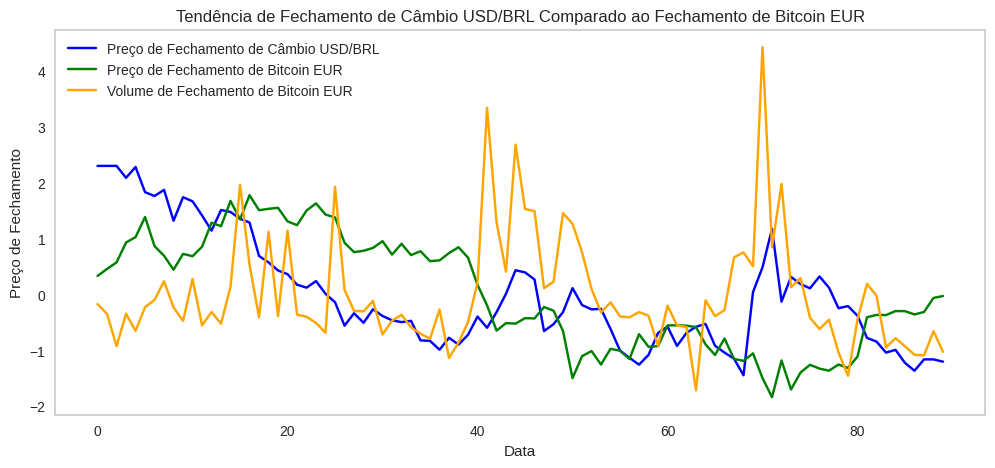

In [108]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_normalized_df.index, fx_btc_normalized_df['fx_close'], label='Preço de Fechamento de Câmbio USD/BRL', color='blue')
plt.plot(fx_btc_normalized_df.index, fx_btc_normalized_df['btc_close'], label='Preço de Fechamento de Bitcoin EUR', color='green')
plt.plot(fx_btc_normalized_df.index, fx_btc_normalized_df['btc_volume'], label='Volume de Fechamento de Bitcoin EUR', color='orange')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência de Fechamento de Câmbio USD/BRL Comparado ao Fechamento de Bitcoin EUR')
plt.legend()
plt.grid()
plt.show()

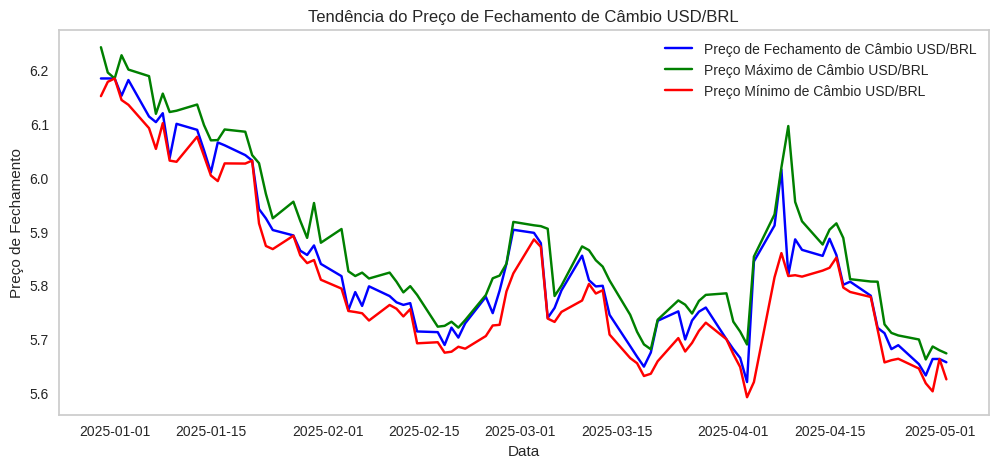

In [109]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['fx_close'], label='Preço de Fechamento de Câmbio USD/BRL', color='blue')
plt.plot(fx_btc_df.index, fx_btc_df['fx_high'], label='Preço Máximo de Câmbio USD/BRL', color='green')
plt.plot(fx_btc_df.index, fx_btc_df['fx_low'], label='Preço Mínimo de Câmbio USD/BRL', color='red')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Preço de Fechamento de Câmbio USD/BRL')
plt.legend()
plt.grid()
plt.show()

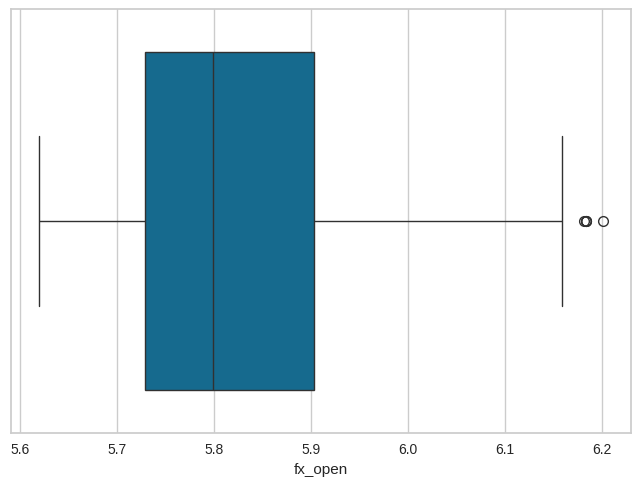

In [110]:
sns.boxplot(x=fx_btc_df['fx_open']);

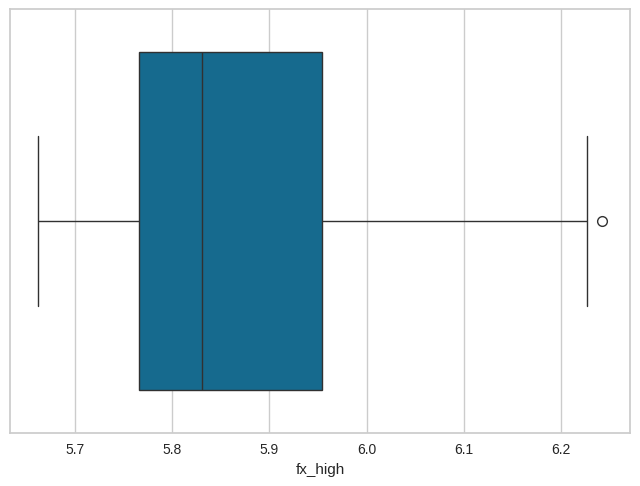

In [111]:
sns.boxplot(x=fx_btc_df['fx_high']);

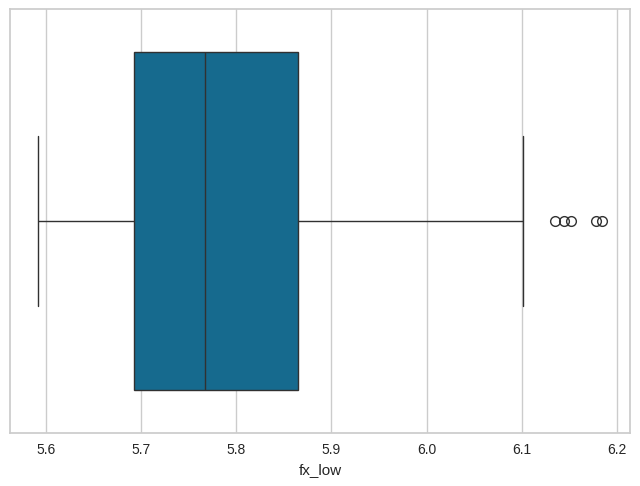

In [112]:
sns.boxplot(x=fx_btc_df['fx_low']);

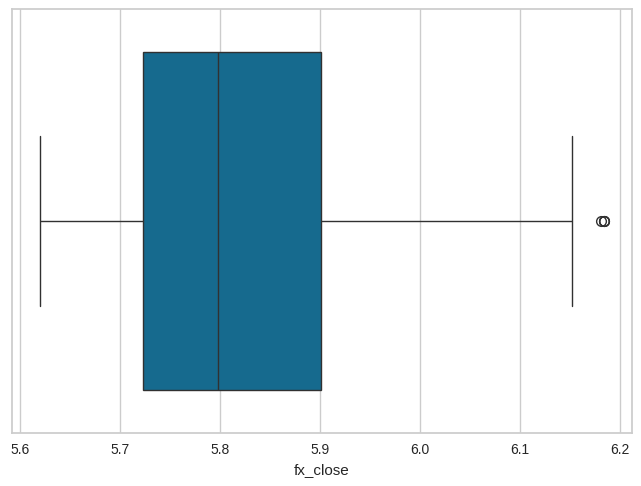

In [113]:
sns.boxplot(x=fx_btc_df['fx_close']);

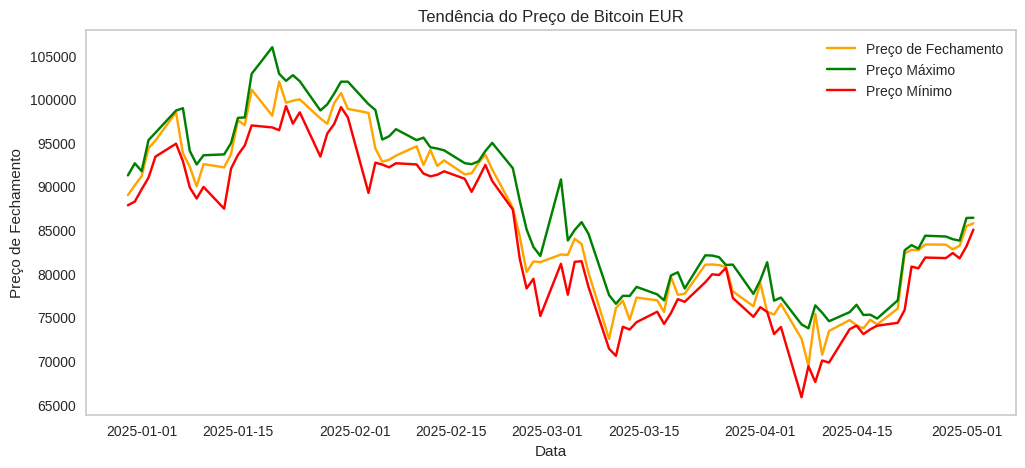

In [114]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['btc_close'], label='Preço de Fechamento', color='orange')
plt.plot(fx_btc_df.index, fx_btc_df['btc_high'], label='Preço Máximo', color='green')
plt.plot(fx_btc_df.index, fx_btc_df['btc_low'], label='Preço Mínimo', color='red')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Preço de Bitcoin EUR')
plt.legend()
plt.grid()
plt.show()

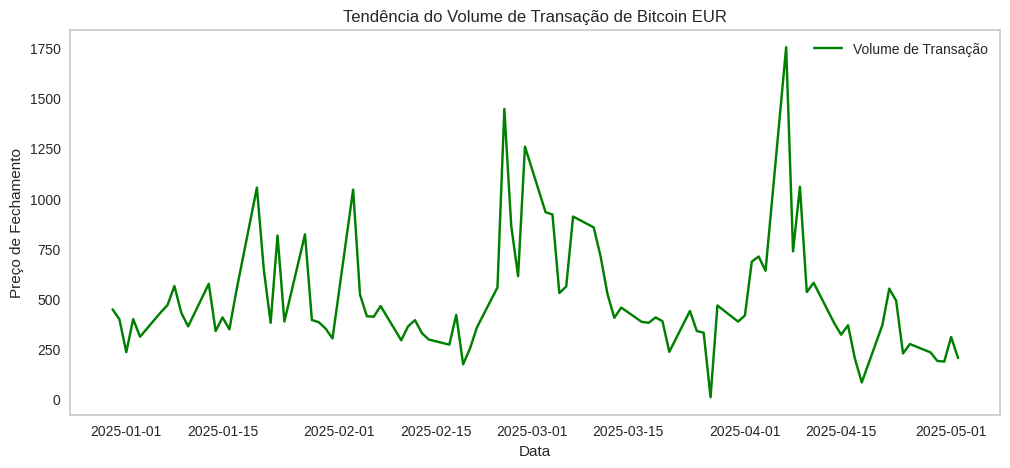

In [115]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['btc_volume'], label='Volume de Transação', color='green')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Volume de Transação de Bitcoin EUR')
plt.legend()
plt.grid()
plt.show()

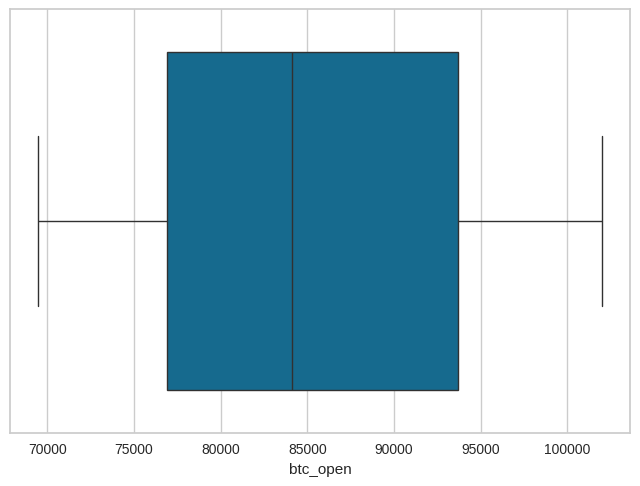

In [116]:
sns.boxplot(x=fx_btc_df['btc_open']);

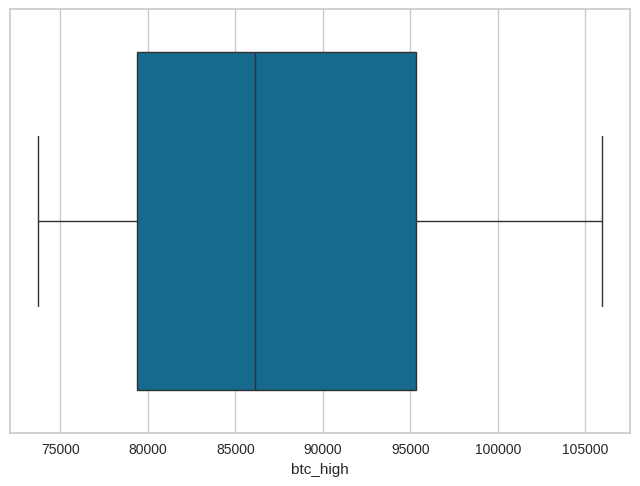

In [117]:
sns.boxplot(x=fx_btc_df['btc_high']);

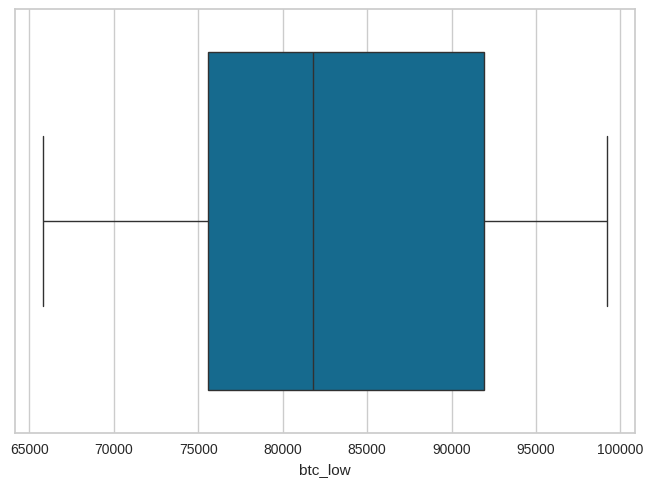

In [118]:
sns.boxplot(x=fx_btc_df['btc_low']);

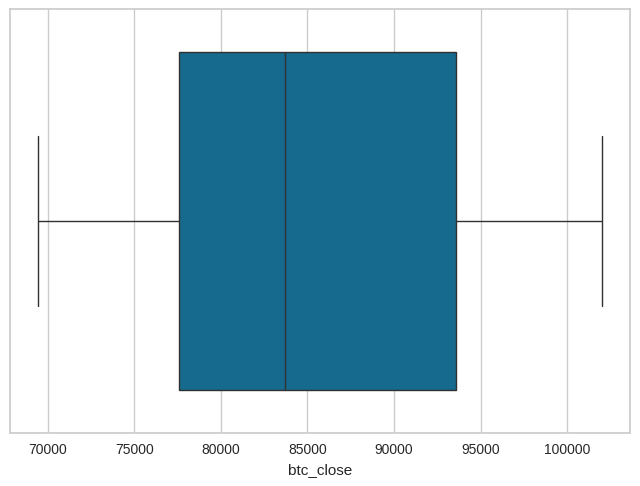

In [119]:
sns.boxplot(x=fx_btc_df['btc_close']);

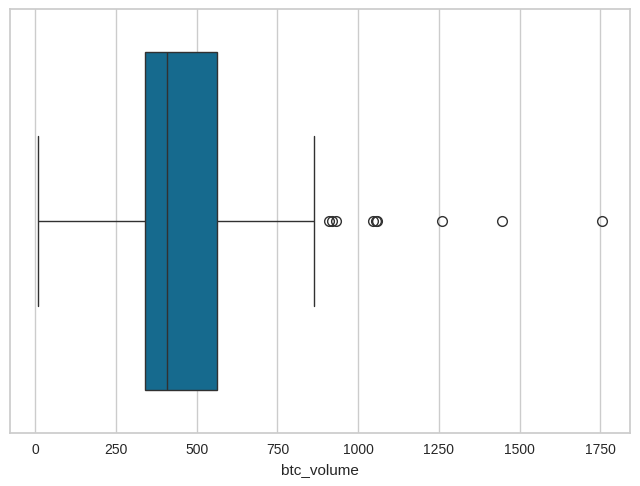

In [120]:
sns.boxplot(x=fx_btc_df['btc_volume']);

### Engenharia de Atributos

#### Variação do Câmbio USD/BRL

In [121]:
fx_btc_df['fx_variation'] = fx_btc_df['fx_close'].diff().shift(-1)
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000
2025-01-01,6.1840,6.1840,6.1840,6.1840,90116.04,91749.00,89665.00,91175.14,233.820394,-0.0321
2025-01-02,6.1840,6.2271,6.1440,6.1519,91173.50,95306.46,91000.00,94383.32,398.801032,0.0292
2025-01-03,6.1589,6.2005,6.1351,6.1811,94411.14,96143.44,93405.23,95250.00,310.964050,-0.0678
...,...,...,...,...,...,...,...,...,...,...
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0211
2025-04-29,5.6517,5.6623,5.6181,5.6326,83334.29,83941.73,82354.90,82783.16,190.013619,0.0306
2025-04-30,5.6326,5.6864,5.6031,5.6632,82783.16,83777.88,81751.27,83185.77,186.951319,0.0000
2025-05-01,5.6632,5.6793,5.6632,5.6632,83177.69,86376.89,83134.33,85446.97,309.623939,-0.0061


#### Variação do Bitcoin EUR

In [122]:
fx_btc_df['btc_variation'] = fx_btc_df['btc_close'].diff().shift(-1)
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31
2025-01-01,6.1840,6.1840,6.1840,6.1840,90116.04,91749.00,89665.00,91175.14,233.820394,-0.0321,3208.18
2025-01-02,6.1840,6.2271,6.1440,6.1519,91173.50,95306.46,91000.00,94383.32,398.801032,0.0292,866.68
2025-01-03,6.1589,6.2005,6.1351,6.1811,94411.14,96143.44,93405.23,95250.00,310.964050,-0.0678,3245.27
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0211,-537.09
2025-04-29,5.6517,5.6623,5.6181,5.6326,83334.29,83941.73,82354.90,82783.16,190.013619,0.0306,402.61
2025-04-30,5.6326,5.6864,5.6031,5.6632,82783.16,83777.88,81751.27,83185.77,186.951319,0.0000,2261.20
2025-05-01,5.6632,5.6793,5.6632,5.6632,83177.69,86376.89,83134.33,85446.97,309.623939,-0.0061,313.39


#### Média Móvel do Bitcoin EUR

In [123]:
fx_btc_df['btc_moving_average'] = fx_btc_df['btc_close'].shift(1).rolling(window=5).mean()
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89,NaN
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31,NaN
2025-01-01,6.1840,6.1840,6.1840,6.1840,90116.04,91749.00,89665.00,91175.14,233.820394,-0.0321,3208.18,NaN
2025-01-02,6.1840,6.2271,6.1440,6.1519,91173.50,95306.46,91000.00,94383.32,398.801032,0.0292,866.68,NaN
2025-01-03,6.1589,6.2005,6.1351,6.1811,94411.14,96143.44,93405.23,95250.00,310.964050,-0.0678,3245.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0211,-537.09,81412.586
2025-04-29,5.6517,5.6623,5.6181,5.6326,83334.29,83941.73,82354.90,82783.16,190.013619,0.0306,402.61,82877.520
2025-04-30,5.6326,5.6864,5.6031,5.6632,82783.16,83777.88,81751.27,83185.77,186.951319,0.0000,2261.20,82967.388
2025-05-01,5.6632,5.6793,5.6632,5.6632,83177.69,86376.89,83134.33,85446.97,309.623939,-0.0061,313.39,83060.890


#### Tratamento de Valores Faltantes após Aplicação de Engenharia de Atributos

In [124]:
fx_btc_df.describe()

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,89.000000,89.000000,85.000000
mean,5.843988,5.878164,5.806181,5.837443,85887.987111,87835.511556,83867.878111,85977.717222,495.664441,-0.005920,-36.343596,85924.391388
std,0.155441,0.154398,0.151957,0.151135,9077.459514,9173.049988,9036.021930,9051.289496,285.604236,0.050986,2457.028621,9039.786394
min,5.620400,5.662300,5.592200,5.620400,69464.170000,73727.090000,65826.000000,69444.220000,9.353113,-0.196100,-7590.670000,72292.404000
25%,5.728750,5.765750,5.692500,5.723425,76893.767500,79370.820000,75605.725000,77598.955000,339.298560,-0.029600,-1690.980000,77793.136000
50%,5.799550,5.830350,5.767600,5.798000,84129.195000,86138.445000,81807.355000,83687.695000,407.141875,-0.010400,23.920000,82967.388000
75%,5.903075,5.954300,5.865350,5.901300,93692.180000,95304.407500,91949.725000,93601.647500,563.080198,0.018600,1212.390000,93669.906000
max,6.201100,6.242000,6.184000,6.184000,101996.930000,105951.190000,99202.850000,102009.110000,1754.166989,0.223900,6338.240000,100120.086000


In [125]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-30 to 2025-05-02
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fx_open             90 non-null     float64
 1   fx_high             90 non-null     float64
 2   fx_low              90 non-null     float64
 3   fx_close            90 non-null     float64
 4   btc_open            90 non-null     float64
 5   btc_high            90 non-null     float64
 6   btc_low             90 non-null     float64
 7   btc_close           90 non-null     float64
 8   btc_volume          90 non-null     float64
 9   fx_variation        89 non-null     float64
 10  btc_variation       89 non-null     float64
 11  btc_moving_average  85 non-null     float64
dtypes: float64(12)
memory usage: 9.1 KB


In [126]:
fx_btc_df['fx_variation'] = fx_btc_df['fx_variation'].fillna(0)
fx_btc_df['btc_variation'] = fx_btc_df['btc_variation'].fillna(0)

In [127]:
prev_five_fx_btc_df = pd.merge(fx_df, btc_df, left_index=True, right_index=True, how='inner')
prev_five_fx_btc_df = prev_five_fx_btc_df.tail(95)
prev_five_fx_btc_df = prev_five_fx_btc_df.head(10)
prev_five_fx_btc_df['btc_moving_average'] = prev_five_fx_btc_df['4. close_y'].shift(1).rolling(window=5).mean()
prev_five_fx_btc_df = prev_five_fx_btc_df.tail(5)
prev_five_fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume,btc_moving_average
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032,92764.794
2024-12-31,6.18400,6.19500,6.17780,6.18400,89007.78000000,92638.09000000,88252.45000000,90119.83000000,397.73855381,92341.158
2025-01-01,6.18400,6.18400,6.18400,6.18400,90116.04000000,91749.00000000,89665.00000000,91175.14000000,233.82039366,91392.042
2025-01-02,6.18400,6.22710,6.14400,6.15190,91173.50000000,95306.46000000,91000.00000000,94383.32000000,398.80103233,90503.950
2025-01-03,6.15890,6.20050,6.13510,6.18110,94411.14000000,96143.44000000,93405.23000000,95250.00000000,310.96405010,91017.078


In [128]:
btc_moving_average_missed_values = prev_five_fx_btc_df['btc_moving_average'].iloc[:5].values
fx_btc_df.loc[fx_btc_df.index[:5], 'btc_moving_average'] = btc_moving_average_missed_values
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89,92764.794
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31,92341.158
2025-01-01,6.1840,6.1840,6.1840,6.1840,90116.04,91749.00,89665.00,91175.14,233.820394,-0.0321,3208.18,91392.042
2025-01-02,6.1840,6.2271,6.1440,6.1519,91173.50,95306.46,91000.00,94383.32,398.801032,0.0292,866.68,90503.950
2025-01-03,6.1589,6.2005,6.1351,6.1811,94411.14,96143.44,93405.23,95250.00,310.964050,-0.0678,3245.27,91017.078
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0211,-537.09,81412.586
2025-04-29,5.6517,5.6623,5.6181,5.6326,83334.29,83941.73,82354.90,82783.16,190.013619,0.0306,402.61,82877.520
2025-04-30,5.6326,5.6864,5.6031,5.6632,82783.16,83777.88,81751.27,83185.77,186.951319,0.0000,2261.20,82967.388
2025-05-01,5.6632,5.6793,5.6632,5.6632,83177.69,86376.89,83134.33,85446.97,309.623939,-0.0061,313.39,83060.890


In [129]:
fx_btc_df.describe()

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.843988,5.878164,5.806181,5.837443,85887.987111,87835.511556,83867.878111,85977.717222,495.664441,-0.005854,-35.939778,86239.914333
std,0.155441,0.154398,0.151957,0.151135,9077.459514,9173.049988,9036.021930,9051.289496,285.604236,0.050702,2443.189099,8881.301586
min,5.620400,5.662300,5.592200,5.620400,69464.170000,73727.090000,65826.000000,69444.220000,9.353113,-0.196100,-7590.670000,72292.404000
25%,5.728750,5.765750,5.692500,5.723425,76893.767500,79370.820000,75605.725000,77598.955000,339.298560,-0.029275,-1667.737500,77920.420000
50%,5.799550,5.830350,5.767600,5.798000,84129.195000,86138.445000,81807.355000,83687.695000,407.141875,-0.010300,11.960000,84338.578000
75%,5.903075,5.954300,5.865350,5.901300,93692.180000,95304.407500,91949.725000,93601.647500,563.080198,0.018375,1203.882500,93521.552000
max,6.201100,6.242000,6.184000,6.184000,101996.930000,105951.190000,99202.850000,102009.110000,1754.166989,0.223900,6338.240000,100120.086000


In [130]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-30 to 2025-05-02
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fx_open             90 non-null     float64
 1   fx_high             90 non-null     float64
 2   fx_low              90 non-null     float64
 3   fx_close            90 non-null     float64
 4   btc_open            90 non-null     float64
 5   btc_high            90 non-null     float64
 6   btc_low             90 non-null     float64
 7   btc_close           90 non-null     float64
 8   btc_volume          90 non-null     float64
 9   fx_variation        90 non-null     float64
 10  btc_variation       90 non-null     float64
 11  btc_moving_average  90 non-null     float64
dtypes: float64(12)
memory usage: 11.2 KB


#### Definição de Atributo Alvo (Traget)

In [131]:
def define_scenario(row):
    if abs(row['btc_variation']) <= 0.02 and abs(row['btc_variation']) >= -0.02:
        return 'Neutral'
    elif row['btc_variation'] > 0.02 and row['fx_variation'] > 0:
        return 'Crypto-Friendly'
    elif row['btc_variation'] < 0.02 and row['fx_variation'] > 0:
        return 'Conservative'
    else:
        return 'Neutral'

In [132]:
fx_btc_df['scenario'] = fx_btc_df.apply(define_scenario, axis=1)
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average,scenario
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89,92764.794,Neutral
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31,92341.158,Neutral
2025-01-01,6.1840,6.1840,6.1840,6.1840,90116.04,91749.00,89665.00,91175.14,233.820394,-0.0321,3208.18,91392.042,Neutral
2025-01-02,6.1840,6.2271,6.1440,6.1519,91173.50,95306.46,91000.00,94383.32,398.801032,0.0292,866.68,90503.950,Crypto-Friendly
2025-01-03,6.1589,6.2005,6.1351,6.1811,94411.14,96143.44,93405.23,95250.00,310.964050,-0.0678,3245.27,91017.078,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0211,-537.09,81412.586,Neutral
2025-04-29,5.6517,5.6623,5.6181,5.6326,83334.29,83941.73,82354.90,82783.16,190.013619,0.0306,402.61,82877.520,Crypto-Friendly
2025-04-30,5.6326,5.6864,5.6031,5.6632,82783.16,83777.88,81751.27,83185.77,186.951319,0.0000,2261.20,82967.388,Neutral
2025-05-01,5.6632,5.6793,5.6632,5.6632,83177.69,86376.89,83134.33,85446.97,309.623939,-0.0061,313.39,83060.890,Neutral


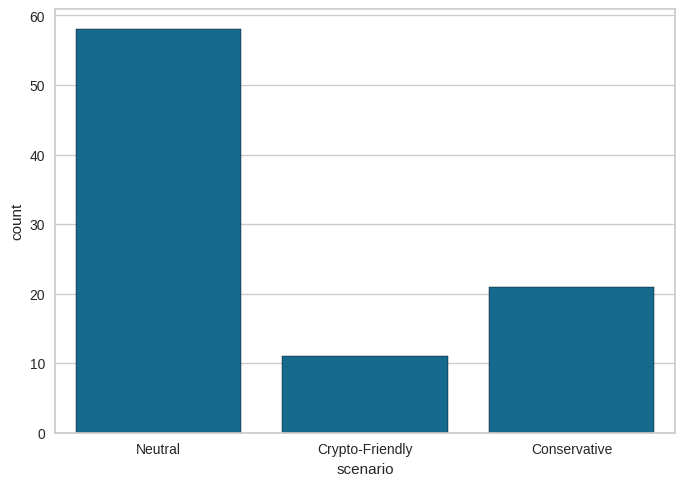

In [133]:
sns.countplot(x = fx_btc_df['scenario'], edgecolor = 'black');

### Normalização dos Dados

#### Separação de Atributos Preditores e Classe

In [134]:
x_fx_btc = fx_btc_df.iloc[:, 9:12].values
x_fx_btc.shape

(90, 3)

In [135]:
y_fx_btc = fx_btc_df.iloc[:, 12].values
y_fx_btc.shape

(90,)

#### Padronização dos Dados

In [136]:
x_fx_btc = standardScaler.fit_transform(x_fx_btc)

### Separação dos Dados de Treinamento e Teste

In [137]:
x_fx_btc_train, x_fx_btc_test, y_fx_btc_train, y_fx_btc_test = train_test_split(x_fx_btc, y_fx_btc, test_size=0.20, random_state=0)

### Conversão e Exportação de Arquivo para Ingestão Neural de Dados

In [138]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/fx_btc.pkl', mode='wb') as f:
  pickle.dump([x_fx_btc_train, x_fx_btc_test, y_fx_btc_train, y_fx_btc_test], f)

## Ingestão Baysidiana de Dados

### Importação de Bibliotecas

In [139]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from collections import Counter

### Carregamento dos Dados para Ingestão Neural

In [140]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/fx_btc.pkl', 'rb') as f:
  x_fx_btc_train, x_fx_btc_test, y_fx_btc_train, y_fx_btc_test = pickle.load(f)

### Ingestão Neural e Testagem de Neurônio Artifial GaussianNB

In [141]:
gnb_fx_btc = GaussianNB()
gnb_fx_btc.fit(x_fx_btc_train, y_fx_btc_train)

GaussianNB()

In [142]:
gnb_fx_btc_predict = gnb_fx_btc.predict(x_fx_btc_test)

### Avaliação do Modelo

#### Acurácia e Eficácia (Accuracy Score e Teorema de Bayes)

In [143]:
gnb_fx_btc_accuracy = accuracy_score(y_fx_btc_test, gnb_fx_btc_predict)
gnb_fx_btc_accuracy

0.9444444444444444

In [144]:
print('P(A) = ' + str(round((gnb_fx_btc_accuracy * 100), 2)) + '%')
pa = gnb_fx_btc_accuracy

P(A) = 94.44%


In [145]:
classes = np.unique(np.concatenate((y_fx_btc_test, gnb_fx_btc_predict)))
bayes_results = {}
for cls in classes:
    p_b = np.sum(gnb_fx_btc_predict == cls) / len(gnb_fx_btc_predict)
    p_a = np.sum(y_fx_btc_test == cls) / len(y_fx_btc_test)
    mask = y_fx_btc_test == cls
    p_b_a = np.sum(gnb_fx_btc_predict[mask] == cls) / np.sum(mask) if np.sum(mask) > 0 else 0
    p_a_b = (p_b_a * p_a) / p_b if p_b > 0 else 0
    bayes_results[cls] = {
        'P(A)': round(p_a, 3),
        'P(B)': round(p_b, 3),
        'P(B|A)': round(p_b_a, 3),
        'P(A|B)': round(p_a_b, 3)
    }
bayes_df = pd.DataFrame(bayes_results).T
print(bayes_df)

                  P(A)   P(B)  P(B|A)  P(A|B)
Conservative     0.278  0.222     0.8   1.000
Crypto-Friendly  0.056  0.056     1.0   1.000
Neutral          0.667  0.722     1.0   0.923


#### Matriz Confusão (Heatmap)

0.9444444444444444

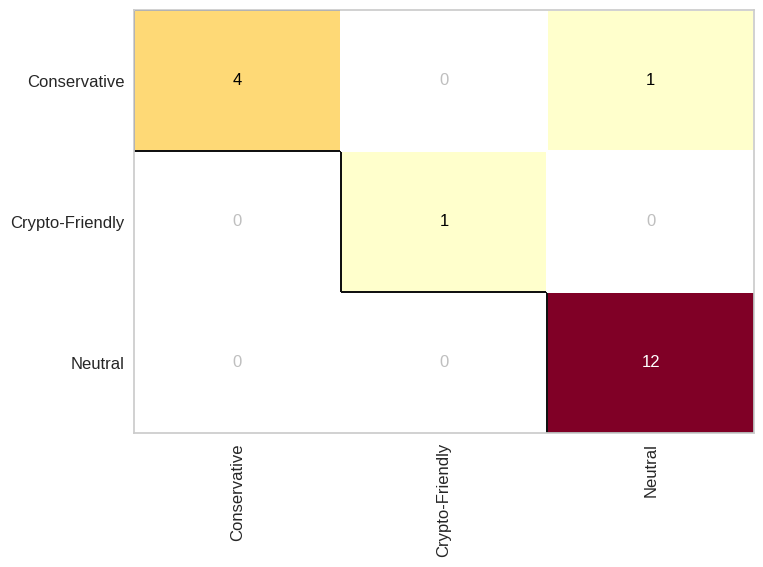

In [146]:
gnb_fx_btc_cm = ConfusionMatrix(gnb_fx_btc)
gnb_fx_btc_cm.fit(x_fx_btc_train, y_fx_btc_train)
gnb_fx_btc_cm.score(x_fx_btc_test, y_fx_btc_test)

#### Relatório de Classificação (Classification Report)

In [147]:
print(classification_report(y_fx_btc_test, gnb_fx_btc_predict))

                 precision    recall  f1-score   support

   Conservative       1.00      0.80      0.89         5
Crypto-Friendly       1.00      1.00      1.00         1
        Neutral       0.92      1.00      0.96        12

       accuracy                           0.94        18
      macro avg       0.97      0.93      0.95        18
   weighted avg       0.95      0.94      0.94        18

